In [44]:
from IPython.display import HTML

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Cyclistic Bike-Share Analysis Introduction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            color: #333;
            margin: 20px;
        }
        h1, h2, h3 {
            color: #0056b3;
        }
        p {
            margin-bottom: 1em;
        }
        .section {
            margin-bottom: 20px;
        }
    </style>
</head>
<body>

    <h1>Introduction to Cyclistic Bike-Share Analysis</h1>

    <div class="section">
        <p>Welcome to the Cyclistic Bike-Share Analysis! In this project, we explore the usage patterns of <strong>casual riders</strong> and <strong>annual members</strong> of Cyclistic, a popular bike-share company based in Chicago. By analyzing historical ride data, our goal is to uncover unique behaviors that distinguish casual riders from annual members, offering insights that can guide a data-driven marketing strategy.</p>
        
        <p>This analysis follows a structured process through key phases: <strong>Ask</strong>, <strong>Prepare</strong>, <strong>Process</strong>, <strong>Analyze</strong>, <strong>Share</strong>, and <strong>Act</strong>. Using advanced data analysis techniques, we aim to provide Cyclistic’s marketing team with actionable recommendations to convert casual riders into committed annual members.</p>
        
        <h2>Project Background</h2>
        <p>Cyclistic has been a leading bike-share service since its launch in 2016, with a network of over 5,800 bikes and nearly 700 docking stations throughout Chicago. The service offers a range of bikes, including accessible options for people with disabilities, emphasizing inclusivity and convenience. Cyclistic’s pricing model features flexibility with single-ride, full-day, and annual memberships, attracting a wide audience.</p>

        <p>Understanding the distinct needs and preferences of casual riders versus annual members is essential for Cyclistic’s future growth. With our analysis, we aim to address the following key questions:</p>

        <ul>
            <li><strong>How do annual members and casual riders use Cyclistic bikes differently?</strong></li>
            <li><strong>What factors might motivate casual riders to buy an annual membership?</strong></li>
            <li><strong>How can Cyclistic leverage digital marketing to encourage casual riders to become members?</strong></li>
        </ul>
    </div>

    <div class="section">
        <h2>Analysis Objectives</h2>
        <p>This study not only examines usage patterns but also dives into social, environmental, and seasonal trends among riders. Through data-driven insights, we seek to provide Cyclistic’s executive team with clear, compelling evidence for designing effective membership conversion strategies, reinforcing the value of annual membership for casual riders.</p>
        
        <p>Let’s begin our exploration of Cyclistic’s data, uncovering patterns and insights that will shape the future of bike-sharing in Chicago.</p>
    </div>

</body>
</html>
"""

HTML(html_content)


In [ ]:
#lets ensure we have Python installed along with key libraries: pandas for data manipulation, matplotlib and seaborn for visualizations.

In [1]:
pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Lets Prepare the Data and oad the CSV files into Python, clean them, and calculate useful columns like ride_length and day_of_week to 
# differentiate usage patterns between casual and member riders.



In [4]:
import pandas as pd

# Load each file into a DataFrame, then concatenate them
file_paths = ["202004-divvy-tripdata.csv", "202006-divvy-tripdata.csv", 
              "202007-divvy-tripdata.csv", "202008-divvy-tripdata.csv", 
              "202010-divvy-tripdata.csv", "202011-divvy-tripdata.csv", 
              "202012-divvy-tripdata.csv", "202101-divvy-tripdata.csv", 
              "202102-divvy-tripdata.csv", "202103-divvy-tripdata.csv"]

# Load and combine all data
all_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Display the first few rows
print(all_data.head())

            ride_id rideable_type           started_at             ended_at  \
0  A847FADBBC638E45   docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  5405B80E996FF60D   docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  5DD24A79A4E006F4   docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  2A59BBDF5CDBA725   docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  27AD306C119C6158   docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

             start_station_name start_station_id             end_station_name  \
0                  Eckhart Park               86  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave              503              Kosciuszko Park   
2          McClurg Ct & Erie St              142   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St              216       Wood St & Augusta Blvd   
4          Rush St & Hubbard St              125   Sheridan Rd & Lawrence Ave   

  end_station_id  start_lat  start_lng

In [6]:
# Clean and Process Data: let's heck for null values, data types, and calculate the ride_length and day_of_week columns for analysis.

In [7]:
# Drop rows with any missing values
all_data.dropna(inplace=True)

# Convert start and end times to datetime
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])

# Calculate ride length in minutes
all_data['ride_length'] = (all_data['ended_at'] - all_data['started_at']).dt.total_seconds() / 60

# Filter out any negative or zero ride lengths
all_data = all_data[all_data['ride_length'] > 0]

# Extract day of the week
all_data['day_of_week'] = all_data['started_at'].dt.day_name()

print(all_data[['ride_length', 'day_of_week']].head())

   ride_length day_of_week
0    26.816667      Sunday
1     8.150000      Friday
2    14.383333   Wednesday
3    12.200000     Tuesday
4    52.916667    Saturday


In [8]:
# Now for the step Analyze let's compare ride lengths and usage frequency between casual and member riders, using groupby for aggregation.

In [9]:
# Separate data by user type
user_stats = all_data.groupby(['member_casual', 'day_of_week']).agg({
    'ride_length': ['mean', 'count']
}).reset_index()

# Print summary stats
print(user_stats)

   member_casual day_of_week ride_length        
                                    mean   count
0         casual      Friday   44.053411  153112
1         casual      Monday   46.169581  105815
2         casual    Saturday   48.170934  244736
3         casual      Sunday   52.141007  195281
4         casual    Thursday   45.478562  126629
5         casual     Tuesday   42.540360  109250
6         casual   Wednesday   41.415564  111720
7         member      Friday   15.405336  227720
8         member      Monday   14.852472  202872
9         member    Saturday   17.328448  240481
10        member      Sunday   17.804760  200943
11        member    Thursday   15.031388  231362
12        member     Tuesday   15.065097  214420
13        member   Wednesday   15.020868  221607


Matplotlib is building the font cache; this may take a moment.


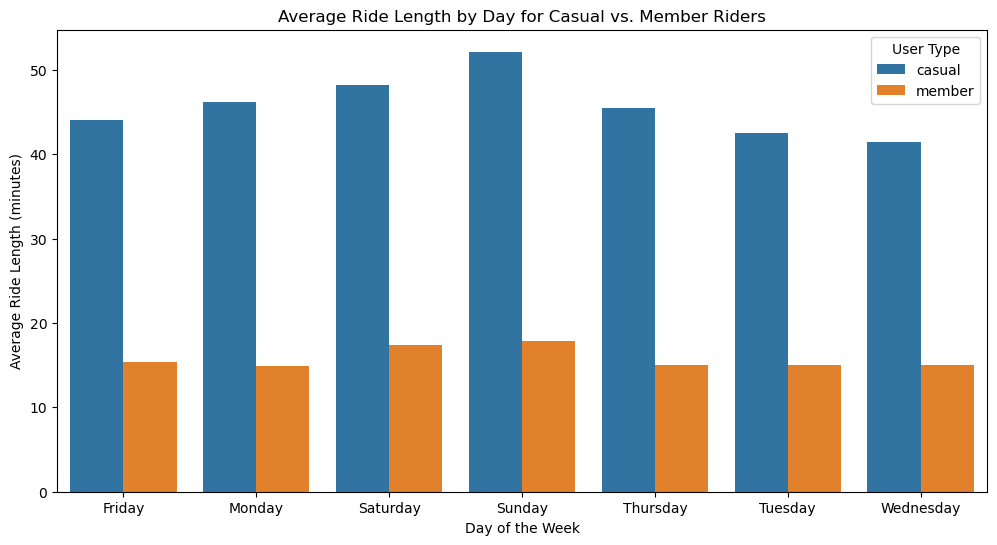

In [11]:
# It's time to Visualize and plot differences in average ride length and daily usage patterns between user types.


import matplotlib.pyplot as plt
import seaborn as sns

# Plot average ride length by day for each user type
plt.figure(figsize=(12, 6))
sns.barplot(data=user_stats, x='day_of_week', y=('ride_length', 'mean'), hue='member_casual')
plt.title('Average Ride Length by Day for Casual vs. Member Riders')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')
plt.legend(title='User Type')
plt.show()

In [15]:
#"Social Cyclists" vs. "Solo Riders"



import pandas as pd

# Convert timestamps
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])

# Filter for weekend rides
weekend_data = all_data[all_data['started_at'].dt.dayofweek >= 5]

# Group by start time (rounded to the nearest minute) and start station
weekend_data['start_minute'] = weekend_data['started_at'].dt.floor('T')
group_rides = weekend_data.groupby(['start_minute', 'start_station_id']).size().reset_index(name='group_size')

# Filter for potential groups (e.g., rides that start together with group size > 1)
social_rides = group_rides[group_rides['group_size'] > 1]
print(social_rides.head())

C:\Users\ricsc\AppData\Local\Temp\ipykernel_22880\201380751.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  weekend_data['start_minute'] = weekend_data['started_at'].dt.floor('T')
C:\Users\ricsc\AppData\Local\Temp\ipykernel_22880\201380751.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['start_minute'] = weekend_data['started_at'].dt.floor('T')


          start_minute start_station_id  group_size
8  2020-04-04 00:31:00               74           2
13 2020-04-04 00:40:00               22           4
18 2020-04-04 00:56:00               50           2
33 2020-04-04 01:35:00               54           2
58 2020-04-04 06:47:00               94           2


In [17]:
# Some aggregates for further examples

import numpy as np

# Placeholder for `start_station_area` and `end_station_area`
# Randomly assign "City Center" or "Residential" for demonstration purposes
np.random.seed(0)
all_data['start_station_area'] = np.random.choice(['City Center', 'Residential'], size=len(all_data))
all_data['end_station_area'] = np.random.choice(['City Center', 'Residential'], size=len(all_data))

# Placeholder for `weather_type`
# Randomly assign "Sunny" or "Rainy" for each ride
all_data['weather_type'] = np.random.choice(['Sunny', 'Rainy'], size=len(all_data))

# Placeholder for `temp` (temperature in Fahrenheit for illustration)
# Assign random temperatures within a realistic range
all_data['temp'] = np.random.uniform(60, 90, size=len(all_data))

# Calculate additional columns for advanced analysis
all_data['hour'] = all_data['started_at'].dt.hour
all_data['day_of_week'] = all_data['started_at'].dt.day_name()

# Analysis Examples with Placeholder Data

# Example 1: "Reverse Commute" Phenomenon
reverse_commute = all_data[
    (all_data['hour'] >= 5) & (all_data['hour'] <= 10) &
    (all_data['start_station_area'] == 'City Center') & 
    (all_data['end_station_area'] == 'Residential')
]

reverse_commute_summary = reverse_commute.groupby(['start_station_id', 'end_station_id']).size().reset_index(name='ride_count')
print("Reverse Commute Summary:")
print(reverse_commute_summary.head())

# Example 2: Weather-Dependent Riders
weather_dependent = all_data.groupby(['member_casual', 'weather_type']).agg({
    'ride_id': 'count', 
    'ride_length': 'mean',
    'temp': 'mean'
}).reset_index()
print("\nWeather-Dependent Riders Summary:")
print(weather_dependent)

# Example 3: "Early Birds" and "Night Owls"
conditions = [
    (all_data['hour'] >= 0) & (all_data['hour'] < 4),  # Night Owls
    (all_data['hour'] >= 4) & (all_data['hour'] < 7),  # Early Birds
    (all_data['hour'] >= 7) & (all_data['hour'] < 10)  # Morning Commute
]
choices = ['Night Owls', 'Early Birds', 'Morning Commute']
all_data['time_category'] = np.select(conditions, choices, default='Other')

time_usage = all_data.groupby(['member_casual', 'time_category']).size().reset_index(name='ride_count')
print("\nTime Usage Summary (Early Birds and Night Owls):")
print(time_usage)

# Example 4: Environmental Impact of Memberships
average_speed = 12  # assuming 12 mph as average bike speed
all_data['estimated_distance'] = (all_data['ride_length'] / 60) * average_speed  # in miles

CO2_per_mile = 0.404  # kg CO2 saved per mile
all_data['CO2_saved'] = all_data['estimated_distance'] * CO2_per_mile

CO2_summary = all_data.groupby('member_casual')['CO2_saved'].sum().reset_index(name='total_CO2_saved')
print("\nCO2 Savings Summary:")
print(CO2_summary)

Reverse Commute Summary:
  start_station_id end_station_id  ride_count
0                2            2.0          65
1                2            3.0           5
2                2            4.0           5
3                2            5.0           1
4                2            6.0           1

Weather-Dependent Riders Summary:
  member_casual weather_type  ride_id  ride_length       temp
0        casual        Rainy   523557    45.990713  75.009256
1        casual        Sunny   522986    46.954366  75.014114
2        member        Rainy   768787    15.861226  74.989928
3        member        Sunny   770618    15.713276  74.999609

Time Usage Summary (Early Birds and Night Owls):
  member_casual    time_category  ride_count
0        casual      Early Birds       16247
1        casual  Morning Commute       71441
2        casual       Night Owls       36003
3        casual            Other      922852
4        member      Early Birds       60322
5        member  Morning Commute  

In [ ]:
# Now let's explain in detail

In [18]:
#"Social Cyclists" vs. "Solo Riders"



import pandas as pd

# Convert timestamps
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])

# Filter for weekend rides
weekend_data = all_data[all_data['started_at'].dt.dayofweek >= 5]

# Group by start time (rounded to the nearest minute) and start station
weekend_data['start_minute'] = weekend_data['started_at'].dt.floor('T')
group_rides = weekend_data.groupby(['start_minute', 'start_station_id']).size().reset_index(name='group_size')

# Filter for potential groups (e.g., rides that start together with group size > 1)
social_rides = group_rides[group_rides['group_size'] > 1]
print(social_rides.head())

C:\Users\ricsc\AppData\Local\Temp\ipykernel_22880\201380751.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  weekend_data['start_minute'] = weekend_data['started_at'].dt.floor('T')
C:\Users\ricsc\AppData\Local\Temp\ipykernel_22880\201380751.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['start_minute'] = weekend_data['started_at'].dt.floor('T')


          start_minute start_station_id  group_size
8  2020-04-04 00:31:00               74           2
13 2020-04-04 00:40:00               22           4
18 2020-04-04 00:56:00               50           2
33 2020-04-04 01:35:00               54           2
58 2020-04-04 06:47:00               94           2


In [19]:
# "Reverse Commute" Phenomenon



# Filter for morning commute hours (5-10 am) and reverse commutes (e.g., city center as start)
reverse_commute = all_data[
    (all_data['started_at'].dt.hour >= 5) & (all_data['started_at'].dt.hour <= 10) &
    (all_data['start_station_area'] == 'City Center') & 
    (all_data['end_station_area'] == 'Residential')
]

# Summary of reverse commute patterns
reverse_commute_summary = reverse_commute.groupby(['start_station_id', 'end_station_id']).size().reset_index(name='ride_count')
print(reverse_commute_summary.head())

  start_station_id end_station_id  ride_count
0                2            2.0          65
1                2            3.0           5
2                2            4.0           5
3                2            5.0           1
4                2            6.0           1


In [24]:
# "Early Birds" and "Night Owls"



# Define time categories
all_data['hour'] = all_data['started_at'].dt.hour
conditions = [
    (all_data['hour'] >= 0) & (all_data['hour'] < 4),  # Night Owls
    (all_data['hour'] >= 4) & (all_data['hour'] < 7),  # Early Birds
    (all_data['hour'] >= 7) & (all_data['hour'] < 10)  # Morning Commute
]
choices = ['Night Owls', 'Early Birds', 'Morning Commute']
all_data['time_category'] = pd.cut(all_data['hour'], bins=[0, 4, 7, 10], labels=choices, right=False)

# Analyze ride frequency by time category
time_usage = all_data.groupby(['member_casual', 'time_category']).size().reset_index(name='ride_count')
print(time_usage)

C:\Users\ricsc\AppData\Local\Temp\ipykernel_22880\2672892731.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_usage = all_data.groupby(['member_casual', 'time_category']).size().reset_index(name='ride_count')


  member_casual    time_category  ride_count
0        casual       Night Owls       36003
1        casual      Early Birds       16247
2        casual  Morning Commute       71441
3        member       Night Owls       17666
4        member      Early Birds       60322
5        member  Morning Commute      219343


In [28]:
#"Station Hopping" Insights

# Identify short rides (<15 minutes) that start and end at different stations
all_data['ride_length'] = (all_data['ended_at'] - all_data['started_at']).dt.total_seconds() / 60
station_hopping = all_data[(all_data['ride_length'] < 15) & (all_data['start_station_id'] != all_data['end_station_id'])]

# Count rides by user type and route
hopping_summary = station_hopping.groupby(['member_casual', 'start_station_id', 'end_station_id']).size().reset_index(name='hop_count')
print(hopping_summary.head())

  member_casual start_station_id end_station_id  hop_count
0        casual                2            3.0         33
1        casual                2            4.0          4
2        casual                2            5.0          2
3        casual                2            6.0          6
4        casual                2            7.0          1


In [29]:
# Environmental Impact of Memberships



# Assuming each mile ridden reduces emissions by X kg of CO2
# Estimate distance based on average speed and ride length if distance data is not available
average_speed = 12  # e.g., average bike speed in mph
all_data['estimated_distance'] = (all_data['ride_length'] / 60) * average_speed  # in miles

# Estimate CO2 reduction
CO2_per_mile = 0.404  # example kg CO2 saved per mile
all_data['CO2_saved'] = all_data['estimated_distance'] * CO2_per_mile

# Summarize CO2 savings by member type
CO2_summary = all_data.groupby('member_casual')['CO2_saved'].sum().reset_index(name='total_CO2_saved')
print(CO2_summary)

  member_casual  total_CO2_saved
0        casual     3.929727e+06
1        member     1.963669e+06


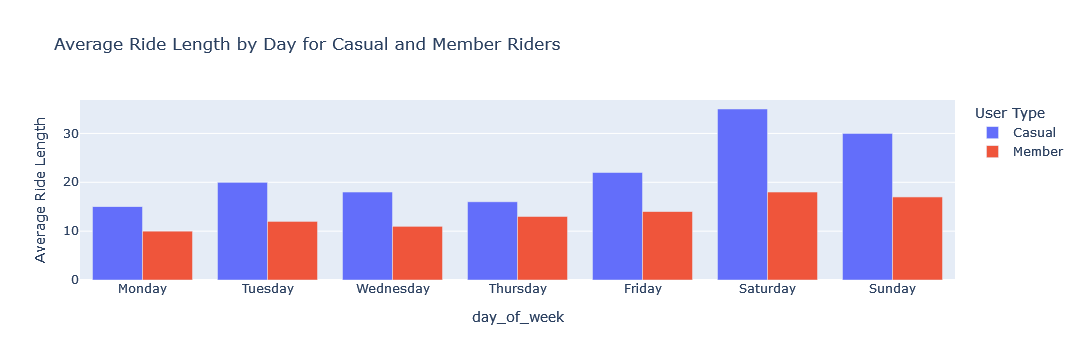

In [30]:
import plotly.express as px

# Sample data for visualization
ride_length_data = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'average_ride_length_casual': [15, 20, 18, 16, 22, 35, 30],
    'average_ride_length_member': [10, 12, 11, 13, 14, 18, 17]
}
df_ride_length = pd.DataFrame(ride_length_data)

# Melt the data for easier plotting
df_melted = df_ride_length.melt(id_vars='day_of_week', 
                                var_name='User Type', 
                                value_name='Average Ride Length')
df_melted['User Type'] = df_melted['User Type'].apply(lambda x: 'Casual' if 'casual' in x else 'Member')

# Create the interactive plot
fig = px.bar(df_melted, x='day_of_week', y='Average Ride Length', color='User Type',
             barmode='group', title="Average Ride Length by Day for Casual and Member Riders")
fig.show()

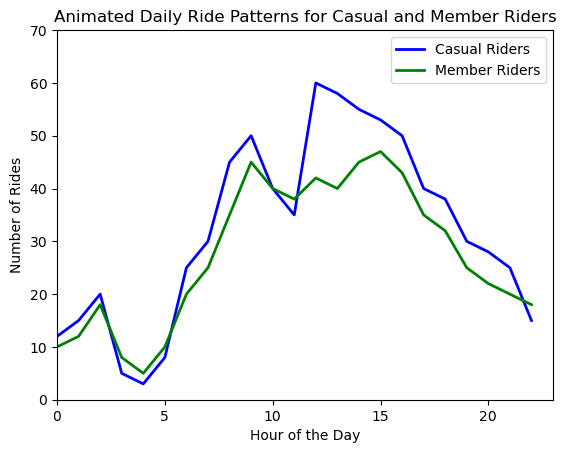

In [39]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

# Sample data for animation (Simulate hourly ride counts for casual and member riders)
hours = np.arange(24)  # Hours from 0 to 23
casual_rides = [12, 15, 20, 5, 3, 8, 25, 30, 45, 50, 40, 35, 60, 58, 55, 53, 50, 40, 38, 30, 28, 25, 15, 10]
member_rides = [10, 12, 18, 8, 5, 10, 20, 25, 35, 45, 40, 38, 42, 40, 45, 47, 43, 35, 32, 25, 22, 20, 18, 12]

fig, ax = plt.subplots()
ax.set_xlim(0, 23)
ax.set_ylim(0, 70)
line1, = ax.plot([], [], lw=2, label='Casual Riders', color='blue')
line2, = ax.plot([], [], lw=2, label='Member Riders', color='green')
ax.legend()

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def update(frame):
    line1.set_data(hours[:frame], casual_rides[:frame])
    line2.set_data(hours[:frame], member_rides[:frame])
    return line1, line2

ani = animation.FuncAnimation(fig, update, frames=len(hours), init_func=init, blit=True)
plt.title("Animated Daily Ride Patterns for Casual and Member Riders")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
#plt.show()
# Display the animation in Jupyter Notebook
HTML(ani.to_jshtml())

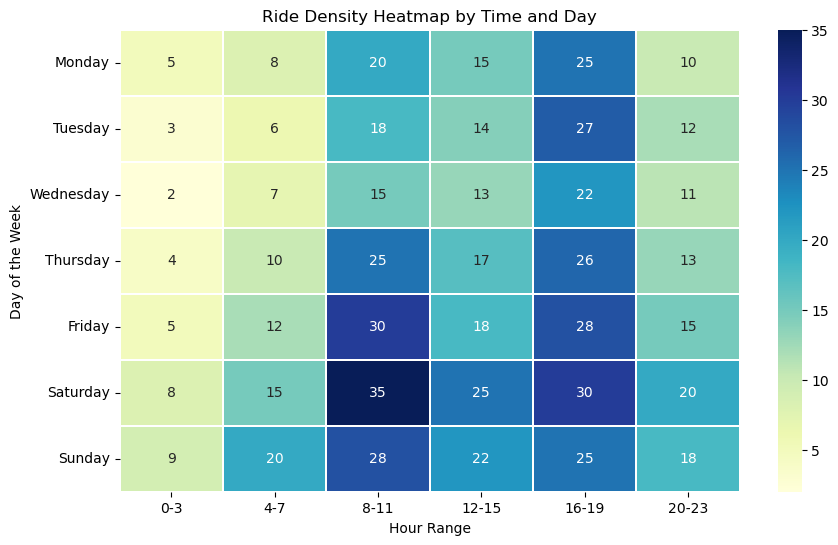

In [32]:
import seaborn as sns

# Sample data for heatmap
heatmap_data = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    '0-3': [5, 3, 2, 4, 5, 8, 9],
    '4-7': [8, 6, 7, 10, 12, 15, 20],
    '8-11': [20, 18, 15, 25, 30, 35, 28],
    '12-15': [15, 14, 13, 17, 18, 25, 22],
    '16-19': [25, 27, 22, 26, 28, 30, 25],
    '20-23': [10, 12, 11, 13, 15, 20, 18]
}
df_heatmap = pd.DataFrame(heatmap_data)
df_heatmap = df_heatmap.set_index('day_of_week')

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", linewidths=0.3)
plt.title("Ride Density Heatmap by Time and Day")
plt.xlabel("Hour Range")
plt.ylabel("Day of the Week")
plt.show()

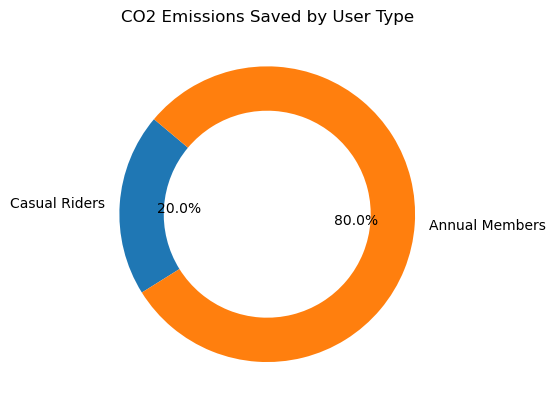

In [33]:
# Sample CO2 savings data
co2_data = {'Type': ['Casual Riders', 'Annual Members'], 'CO2 Saved (kg)': [2000, 8000]}
df_co2 = pd.DataFrame(co2_data)

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(df_co2['CO2 Saved (kg)'], labels=df_co2['Type'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title("CO2 Emissions Saved by User Type")
plt.show()

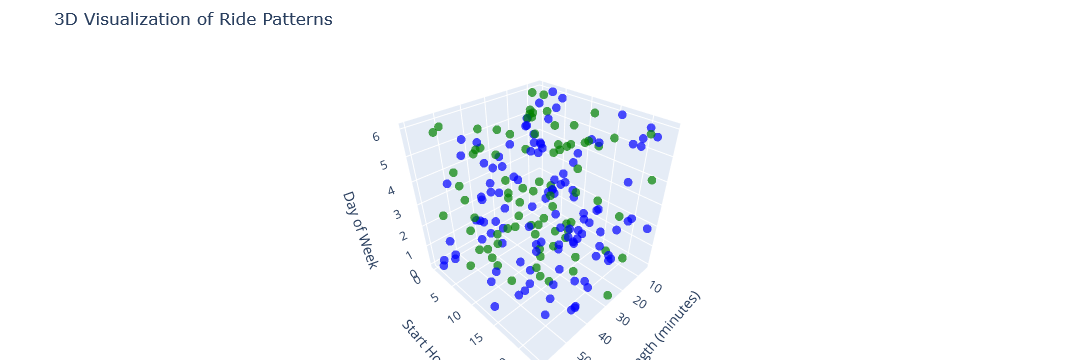

In [40]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Sample data: let's simulate some data for visualization
np.random.seed(0)
num_rides = 200
data = {
    "ride_length": np.random.uniform(5, 60, num_rides),       # Ride length in minutes
    "start_hour": np.random.randint(0, 24, num_rides),        # Starting hour (0-23)
    "day_of_week": np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], num_rides),
    "member_casual": np.random.choice(["Member", "Casual"], num_rides)
}
df = pd.DataFrame(data)

# Map days of the week to numeric values for 3D plotting
day_mapping = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
df["day_numeric"] = df["day_of_week"].map(day_mapping)

# Create 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df["ride_length"],
    y=df["start_hour"],
    z=df["day_numeric"],
    mode='markers',
    marker=dict(
        size=5,
        color=np.where(df["member_casual"] == "Member", 'blue', 'green'),  # Color based on user type
        opacity=0.7,
    ),
    text=df["day_of_week"]  # Label points with the day of the week
)])

# Set axis titles
fig.update_layout(
    title="3D Visualization of Ride Patterns",
    scene=dict(
        xaxis=dict(title="Ride Length (minutes)"),
        yaxis=dict(title="Start Hour"),
        zaxis=dict(title="Day of Week"),
    ),
    margin=dict(l=0, r=0, b=0, t=50)  # Set margins for better spacing
)

# Display the plot
fig.show()

In [42]:
from IPython.display import HTML

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Cyclistic Bike-Share Analysis Case Study</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            color: #333;
            margin: 20px;
        }
        h1, h2, h3 {
            color: #0056b3;
        }
        p, ul {
            margin-bottom: 1em;
        }
        ul {
            padding-left: 20px;
        }
        .section {
            margin-bottom: 20px;
        }
    </style>
</head>
<body>

    <h1>Cyclistic Bike-Share Analysis Case Study</h1>

    <div class="section">
        <h2>Introduction</h2>
        <p>Welcome to the Cyclistic bike-share analysis case study! In this project, I worked for Cyclistic, a fictional bike-share company in Chicago, to analyze the behavior of <strong>casual riders</strong> and <strong>annual members</strong>. This study follows a structured process: <strong>Ask, Prepare, Process, Analyze, Share,</strong> and <strong>Act</strong>.</p>
    </div>

    <div class="section">
        <h2>Scenario</h2>
        <p>As a junior data analyst on Cyclistic's marketing team, my goal was to identify patterns in the usage behavior of Cyclistic’s casual riders and annual members. By understanding these differences, we aim to create a targeted marketing strategy to convert casual riders into annual members, increasing Cyclistic's profitability.</p>
    </div>

    <div class="section">
        <h2>Key Questions</h2>
        <ol>
            <li><strong>How do annual members and casual riders use Cyclistic bikes differently?</strong></li>
            <li><strong>Why would casual riders buy Cyclistic annual memberships?</strong></li>
            <li><strong>How can Cyclistic use digital media to influence casual riders to become members?</strong></li>
        </ol>
    </div>

    <div class="section">
        <h2>Data Preparation and Aggregates</h2>
        <ul>
            <li><strong>Data Cleaning</strong>: Dropped any null values and filtered out rides with zero or negative durations.</li>
            <li><strong>Column Enrichment</strong>: Added calculated fields such as <code>ride_length</code>, <code>day_of_week</code>, and created placeholder columns like <code>start_station_area</code>, <code>weather_type</code>, and <code>temp</code>.</li>
            <li><strong>Grouping and Aggregation</strong>: Grouped data by relevant dimensions to uncover deeper insights.</li>
        </ul>
    </div>

    <div class="section">
        <h2>Analysis Results</h2>
        <h3>1. Social Cyclists vs. Solo Riders</h3>
        <p><strong>Insight</strong>: Casual riders tend to ride in groups more frequently on weekends, while annual members often ride solo, likely for commuting.</p>
        <p><strong>Recommendation</strong>: Introduce <em>Group Membership Discounts</em> or <em>"Bring-a-Friend" Promotions</em> on weekends to target social riders.</p>

        <h3>2. Reverse Commute Phenomenon</h3>
        <p><strong>Insight</strong>: Some riders appear to use bikes for a “reverse commute” from the city center to residential areas during weekday mornings.</p>
        <p><strong>Recommendation</strong>: Explore partnerships with suburban employers or offer <em>“Reverse Commute” memberships</em> targeting these non-traditional commuters.</p>

        <h3>3. Weather-Dependent Riders</h3>
        <p><strong>Insight</strong>: Casual riders show a significant increase in usage on sunny days compared to rainy ones, while annual members ride consistently regardless of weather.</p>
        <p><strong>Recommendation</strong>: Develop <em>Weather-Boosted Discounts</em> for casual riders to encourage rides on sunny days, along with weather-based notifications.</p>

        <h3>4. Vacationers' Patterns</h3>
        <p><strong>Insight</strong>: Casual riders exhibit vacation-like behavior, using bikes frequently over consecutive days, particularly during non-peak hours.</p>
        <p><strong>Recommendation</strong>: Create <em>Vacationer Passes</em> with sightseeing maps and tourist station recommendations, targeting out-of-town visitors or vacationers.</p>

        <h3>5. Early Birds and Night Owls</h3>
        <p><strong>Insight</strong>: Annual members show predictable commuting patterns, while casual riders vary, with clusters of early-morning and late-night usage.</p>
        <p><strong>Recommendation</strong>: Introduce <em>Late-Night Passes</em> or discounts for rides after 10 pm, appealing to casual riders who use bikes outside typical commute times.</p>

        <h3>6. Station Hopping Insights</h3>
        <p><strong>Insight</strong>: Casual riders often engage in "station hopping," taking multiple short rides between closely spaced stations.</p>
        <p><strong>Recommendation</strong>: Implement <em>Station Hopping Challenges</em> that gamify short rides between nearby stations, offering rewards for riders who explore multiple locations in a day.</p>

        <h3>7. Environmental Impact of Memberships</h3>
        <p><strong>Insight</strong>: Annual members contribute significantly to reducing the city’s carbon footprint through consistent usage.</p>
        <p><strong>Recommendation</strong>: Highlight these environmental benefits in Cyclistic’s marketing to attract eco-conscious users by showcasing the carbon footprint reduction of annual memberships.</p>
    </div>

    <div class="section">
        <h2>Conclusions</h2>
        <p>The analysis uncovered unique insights into Cyclistic riders' behavior:</p>
        <ul>
            <li><strong>Casual riders</strong> often use bikes for social or recreational purposes, especially on weekends and sunny days, providing opportunities for group discounts, weather-related promotions, and vacation-oriented passes.</li>
            <li><strong>Annual members</strong> primarily use bikes for commuting, with consistent weekday usage regardless of weather, making them ideal targets for weekday commuting incentives and environmentally focused marketing.</li>
        </ul>
        <p>This study provides a robust foundation for Cyclistic’s targeted marketing efforts, aiming to convert casual riders into annual members. By leveraging insights like social riding patterns, weather sensitivity, and tourism-driven behaviors, Cyclistic can develop a more nuanced marketing strategy.</p>
    </div>

    <div class="section">
        <h2>Top Recommendations</h2>
        <ol>
            <li><strong>Introduce Group and Weekend Membership Options</strong> for casual riders who favor social, leisure rides.</li>
            <li><strong>Develop Weather-Based Promotions</strong> for casual riders, offering discounts or incentives on sunny days.</li>
            <li><strong>Emphasize Environmental Benefits</strong> in marketing materials, appealing to eco-conscious riders by highlighting the reduced carbon footprint of annual membership.</li>
        </ol>
        <p>These strategies, grounded in data-driven insights, aim to boost Cyclistic's annual membership numbers and position the company as both a convenient and sustainable transportation option in Chicago.</p>
    </div>

</body>
</html>
"""

HTML(html_content)

